<a href="https://colab.research.google.com/github/anhhaibkhn/LeetCode_Daily_Challenges/blob/master/JulyLeetCodePart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

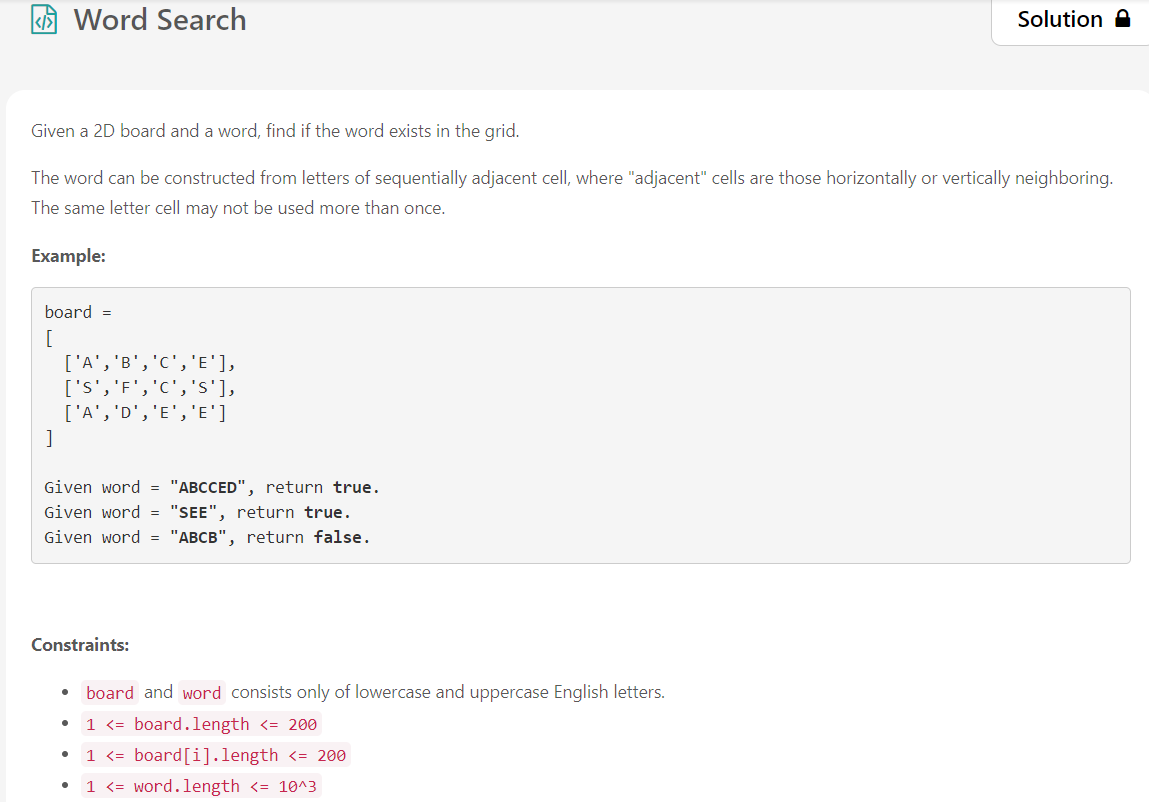

In [ ]:
''' Word Search July 21th
Given a 2D board and a word, find if the word exists in the grid.
The word can be constructed from letters of sequentially adjacent cell, 
where "adjacent" cells are those horizontally or vertically neighboring.
The same letter cell may not be used more than once.

board =
[
  ['A','B','C','E'],
  ['S','F','C','S'],
  ['A','D','E','E']
]

Given word = "ABCCED", return true.
Given word = "SEE", return true.
Given word = "ABCB", return false.

Constraints:
board and word consists only of lowercase and uppercase English letters.
1 <= board.length <= 200
1 <= board[i].length <= 200
1 <= word.length <= 10^3
'''
# Solution 
# For each starting position, depth first search moving
# in all 4 directions and marking visited cells.
# Time - O(m * n * s), for each starting board position, try upto s characters
# Space - O(1)

class Solution(object):
    def exist(self, board, word):
        """
        :type board: List[List[str]]
        :type word: str
        :rtype: bool
        """
        if not board or not board[0]:
            return False
        rows, cols = len(board), len(board[0])

        for r in range(rows):
            for c in range(cols):
                if self.can_find(word, 0, board, r, c):
                    return True
        return False


    def can_find(self, word, i, board, r, c):
        if i >= len(word): # nothing more of word to find
            return True
        if r < 0 or r >= len(board) or c < 0 or c >= len(board[0]): # outside board
            return False
        if word[i] != board[r][c]: # no match letter
            return False

        board[r][c] = '*' # set this position so cannot be used again

        if (self.can_find(word, i+1, board, r+1, c) or self.can_find(word, i+1, board, r-1, c) or
            self.can_find(word, i+1, board, r, c+1) or self.can_find(word, i+1, board, r, c-1)):
            return True

        board[r][c] = word[i] # if False, reset position to letter
        return False



## fastest submission 

class Solution:
    def exist(self, b, w):
        if not b or not b[0]: return False
        bc = Counter(chain(*b))
        wc = Counter(w)
        if any(c > bc[s] for s, c in wc.items()): return False
        m, n, wl = len(b), len(b[0]), len(w) - 1
        def dfs(d: int, x: int, y: int) -> bool:
            if w[d] != b[y][x]: return False
            if d == wl: return True
            c, b[y][x] = b[y][x], ''
            if x > 0 and dfs(d + 1, x - 1, y): return True
            if x < n-1 and dfs(d + 1, x + 1, y): return True
            if y > 0 and dfs(d + 1, x, y - 1): return True
            if y < m-1 and dfs(d + 1, x, y + 1): return True
            b[y][x] = c
            return False
        return any(dfs(0, j, i) for i in range(m) for j in range(n) if w[0] == b[i][j])



In [ ]:
# July 21, other submissions

from collections import Counter

# 1
class Solution1:
    def exist(self, board, word):
        if not board:
            return False
        for i in range(len(board)):
            for j in range(len(board[0])):
                if self.dfs(board, i, j, word):
                    return True
        return False

    def dfs(self, board, i, j, word):
        if len(word) == 0:
            return True
        if i < 0 or i >= len(board) or j < 0 or j >= len(board[0]) or word[0] != board[i][j]:
            return False
        tmp = board[i][j]
        board[i][j] = "#"

        res = self.dfs(board, i + 1, j, word[1:]) or self.dfs(board, i - 1, j, word[1:]) or self.dfs(board, i, j + 1, word[1:]) or self.dfs(board, i, j - 1, word[1:])
        board[i][j] = tmp
        return res

# 2
class Solution:
    def exist(self, board, word):

        if not board or not board[0] or not word:
            return False
        if not self.checkContent(board, word):
            return False
        for i in range(len(board)):
            for j in range(len(board[0])):
                if word[0] == board[i][j] and self.deepDive(board, i, j, word, 1):
                    return True
        return False

    def checkContent(self, board, word):
        board_counter = Counter([char for row in board for char in row])
        word_counter = Counter(word)
        for char in word_counter:
            if board_counter[char] < word_counter[char]:
                return False
        return True

    def deepDive(self, board, i, j, word, position):
        if len(word) == position:
            return True
        m, n = len(board), len(board[0])
        old, board[i][j] = board[i][j], '#'
        if i > 0 and board[i - 1][j] != '#' and board[i - 1][j] == word[position] and self.deepDive(board, i - 1, j, word, position + 1):
            return True
        if i + 1 < m and board[i + 1][j] != '#' and board[i + 1][j] == word[position] and self.deepDive(board, i + 1, j, word, position + 1):
            return True
        if j > 0 and board[i][j - 1] != '#' and board[i][j - 1] == word[position] and self.deepDive(board, i, j - 1, word, position + 1):
            return True
        if j + 1 < n and board[i][j + 1] != '#' and board[i][j + 1] == word[position] and self.deepDive(board, i, j + 1, word, position + 1):
            return True
        board[i][j] = old
        return False

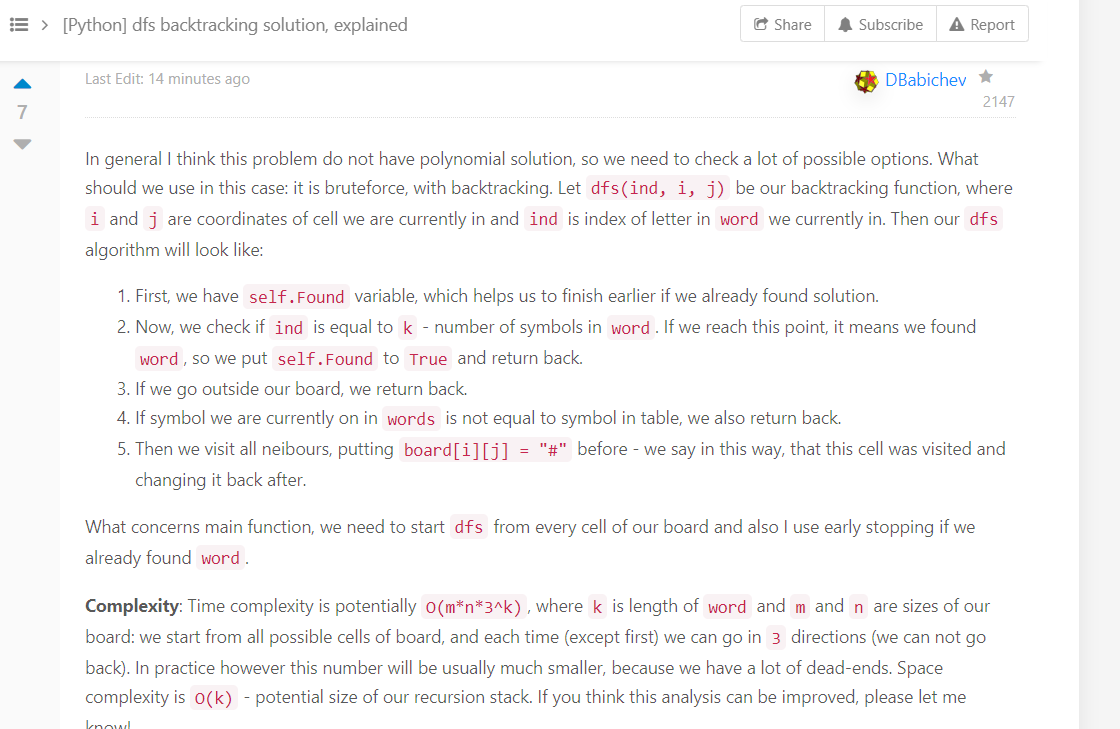

In [ ]:
# Code for the above approach 
class Solution:
    def exist(self, board, word):
        def dfs(ind, i, j):
            if self.Found: return        #early stop if word is found

            if ind == k:
                self.Found = True                #for early stopping
                return 

            if i < 0 or i >= m or j < 0 or j >= n: return 
            tmp = board[i][j]
            if tmp != word[ind]: return

            board[i][j] = "#"
            for x, y in [[0,-1], [0,1], [1,0], [-1,0]]:
                dfs(ind + 1, i+x, j+y)
            board[i][j] = tmp
        
        self.Found = False
        m, n, k = len(board), len(board[0]), len(word)
        
        for i, j in product(range(m), range(n)):
            if self.Found: return True          #early stop if word is found
            dfs(0, i, j)
        return self.Found